In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as mpimg
from scipy.spatial.distance import pdist

pd.set_option('display.max_columns', None)
%matplotlib inline

In [2]:
df_long_3 = pd.read_csv('./data/accuracy_lf_exp3_wprior.csv')

df_long_3_LC_att_TA = pd.read_csv('.\\data\\simulated_data\\LC_discrete_attention_&_att_3_TA.csv')
df_long_3_LC_att_TA = pd.read_csv('.\\data\\simulated_data\\LC_discrete_attention_&_att_prior_3_TA.csv')
df_long_3_norm_TA = pd.read_csv('.\\data\\simulated_data\\normative_&_1_3_TA.csv')


df_long_4 = pd.read_csv('./data/accuracy_lf_exp4_wprior.csv')

df_long_4_LC_att_TA = pd.read_csv('.\\data\\simulated_data\\LC_discrete_attention_&_att_4_TA.csv')
df_long_4_LC_att_TA = pd.read_csv('.\\data\\simulated_data\\LC_discrete_attention_&_att_prior_4_TA.csv')
df_long_4_norm_TA = pd.read_csv('.\\data\\simulated_data\\normative_&_1_4_TA.csv')

In [3]:
# Build full dataset
experiment_num = 4

df_long_3['judgement_accuracy'] = 1
df_long_4['judgement_accuracy'] = 1
final_columns = ['participant', 'scenario', 'difficulty', 'accuracy', 'judgement_accuracy']

df_3_final = df_long_3[final_columns]
df_4_final = df_long_4[final_columns]

df_3_final['model name'] = 'Participants'
df_4_final['model name'] = 'Participants'

print(df_3_final.shape)
models = [
    'LC_discrete_attention_&_att',
    'LC_discrete_attention_&_att_prior',
    'LC_discrete_att_&_att',
    'LC_discrete_att_&_att_prior',
    'LC_discrete_att_all_&_att',
    'LC_discrete_att_all_&_att_prior',
    'Adaptive_LC_&_1',
    'Adaptive_LC_&_prior',
    'Adaptive_Selective_LC_&_1',
    'Adaptive_Selective_LC_&_prior',
    'normative_&_1',
    'normative_&_prior',
    'LC_discrete_&_1',
    'LC_discrete_&_prior',
    'change_d_obs_fk_&_att_cha_prior',
    'change_d_obs_fk_&_att_cha',
    'change_obs_fk_&_att_cha_prior',
    'change_obs_fk_&_att_cha',
    'ces_strength_&_str_guess',
    'ces_no_strength_&_guess'
]

models_labels = {
    'LC_discrete_attention_&_att': 'LC w. attention',
    'LC_discrete_attention_&_att_prior': 'LC w. attention w. prior',
    'LC_discrete_att_&_att': 'TF LC att.',
    'LC_discrete_att_&_att_prior': 'TF LC att. w. prior',
    'Adaptive_LC_&_1': 'Temporal LC',
    'Adaptive_LC_&_prior': 'Temporal LC w. prior',
    'Adaptive_Selective_LC_&_1': 'TF LC',
    'Adaptive_Selective_LC_&_prior': 'TF LC w. prior',
    'LC_discrete_att_all_&_att': 'Temporal LC att.',
    'LC_discrete_att_all_&_att_prior': 'Temporal LC att. w. prior',
    'normative_&_1': 'Normative',
    'normative_&_prior': 'Normative w. prior',
    'LC_discrete_&_1': 'LC basic',
    'LC_discrete_&_prior': 'LC basic w. prior',
    'change_d_obs_fk_&_att_cha_prior': 'Change w. full knowledge w. prior',
    'change_d_obs_fk_&_att_cha': 'Change w. full knowledge',
    'change_obs_fk_&_att_cha_prior': 'Change w. prior',
    'change_obs_fk_&_att_cha': 'Change',
    'ces_strength_&_str_guess': 'CEA strength sensitive',
    'ces_no_strength_&_guess': 'CEA basic'
}

color_dict = {
    'TF LC att.': tuple(sns.color_palette("mako")[3]),
    'TF LC att. w. prior': tuple(sns.color_palette("mako")[4]),
    'TF LC': tuple(sns.light_palette("seagreen")[-1]), 
    'TF LC w. prior': tuple(sns.light_palette("seagreen")[-2]),
    'Temporal LC': tuple(sns.color_palette("mako")[1]), 
    'Temporal LC w. prior': tuple(sns.color_palette("mako")[2]),
    'Change w. full knowledge': tuple(sns.color_palette("mako")[1]), 
    'Change w. full knowledge w. prior': tuple(sns.color_palette("mako")[2]),
    'Change linear cause effect': tuple(sns.color_palette("mako")[3]),
    'Change linear cause': tuple(sns.color_palette("mako")[4]),
    'LC basic': tuple(sns.color_palette("Paired")[5]),
    'LC basic w. prior': tuple(sns.color_palette("Paired")[4]),
    'Normative': tuple(sns.color_palette("Set2")[-3]), 
    'Normative w. prior': tuple(sns.color_palette("Paired")[-2]),
    'CEA strength sensitive': tuple(sns.color_palette("YlOrBr")[4]),
    'CEA basic': tuple(sns.color_palette("YlOrBr")[3]),
    'Baseline': tuple(sns.color_palette("Set2")[-1])
}

markers_dict = {
    'Participants': "p",
    'LC w. attention': ".", 
    'LC w. attention w. prior': "d",
    'TF LC att.': '.', 
    'TF LC att. w. prior': 'd',
    'TF LC': '.', 
    'TF LC w. prior': 'd',
    'Temporal LC': '.', 
    'Temporal LC w. prior': 'd',
    'Change w. full knowledge': ".", 
    'Change w. full knowledge w. prior': "d",
    'Change': ".", 
    'Change w. prior': "d",
    'Change linear cause effect': ".",
    'Change linear cause': ".",
    'LC basic': ".",
    'LC basic w. prior': "d",
    'Normative': ".", 
    'Normative w. prior': "d",
    'CEA strength sensitive': "+",
    'CEA basic': "+",
    'Baseline': "+"
}

## Dictionary for color allocation
def gen_colors(labels, color_dict):
    return [color_dict[label] for label in labels]

def gen_markers(labels, markers_dict, size=5):
    markers = [markers_dict[label] for label in labels]
    sizes = [size for _ in labels]
    return markers, sizes


experiment_nums = [3, 4]
dfs = [
    df_3_final,
    df_4_final
]
for i,e_num in enumerate(experiment_nums):
    
    for model in models:
        df = pd.read_csv(f'.\\data\\simulated_data\\{model}_{e_num}_TA.csv')
        df['tag'] = model
        #print(df.columns)
        df['participant'] = df['participant'] + df['tag']
        df = df[final_columns].copy()
        df = df.replace({'congruent':1, 'incongruent':2})

        df['model name'] = models_labels[model]

        #print(dfs[i].shape)
        dfs[i] = pd.concat([dfs[i], df], axis=0)
        #print(dfs[i].shape)



C:\Users\vbtes\AppData\Local\Temp\ipykernel_61412\1731776627.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_3_final['model name'] = 'Participants'
C:\Users\vbtes\AppData\Local\Temp\ipykernel_61412\1731776627.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_4_final['model name'] = 'Participants'


(238, 6)


['TF LC', 'TF LC w. prior', 'Temporal LC', 'Temporal LC w. prior', 'Normative', 'LC basic', 'CEA strength sensitive', 'CEA basic']


C:\Users\vbtes\AppData\Local\Temp\ipykernel_61412\397640158.py:42: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.pointplot(x=x, y=y, data=df_plot, hue=hue, dodge=True, markers=markers, join=joins, ax=axs[i], scale=1.7, ci=None, order=order_diff)
c:\Utility\Python\python38\lib\site-packages\seaborn\categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.8364167627835448, 0.3390080738177624, 0.028327566320645904)) for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,
c:\Utility\Python\python38\lib\site-packages\seaborn\categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.9551095732410612, 0.5066820453671664, 0.11298731257208766)) for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, lab

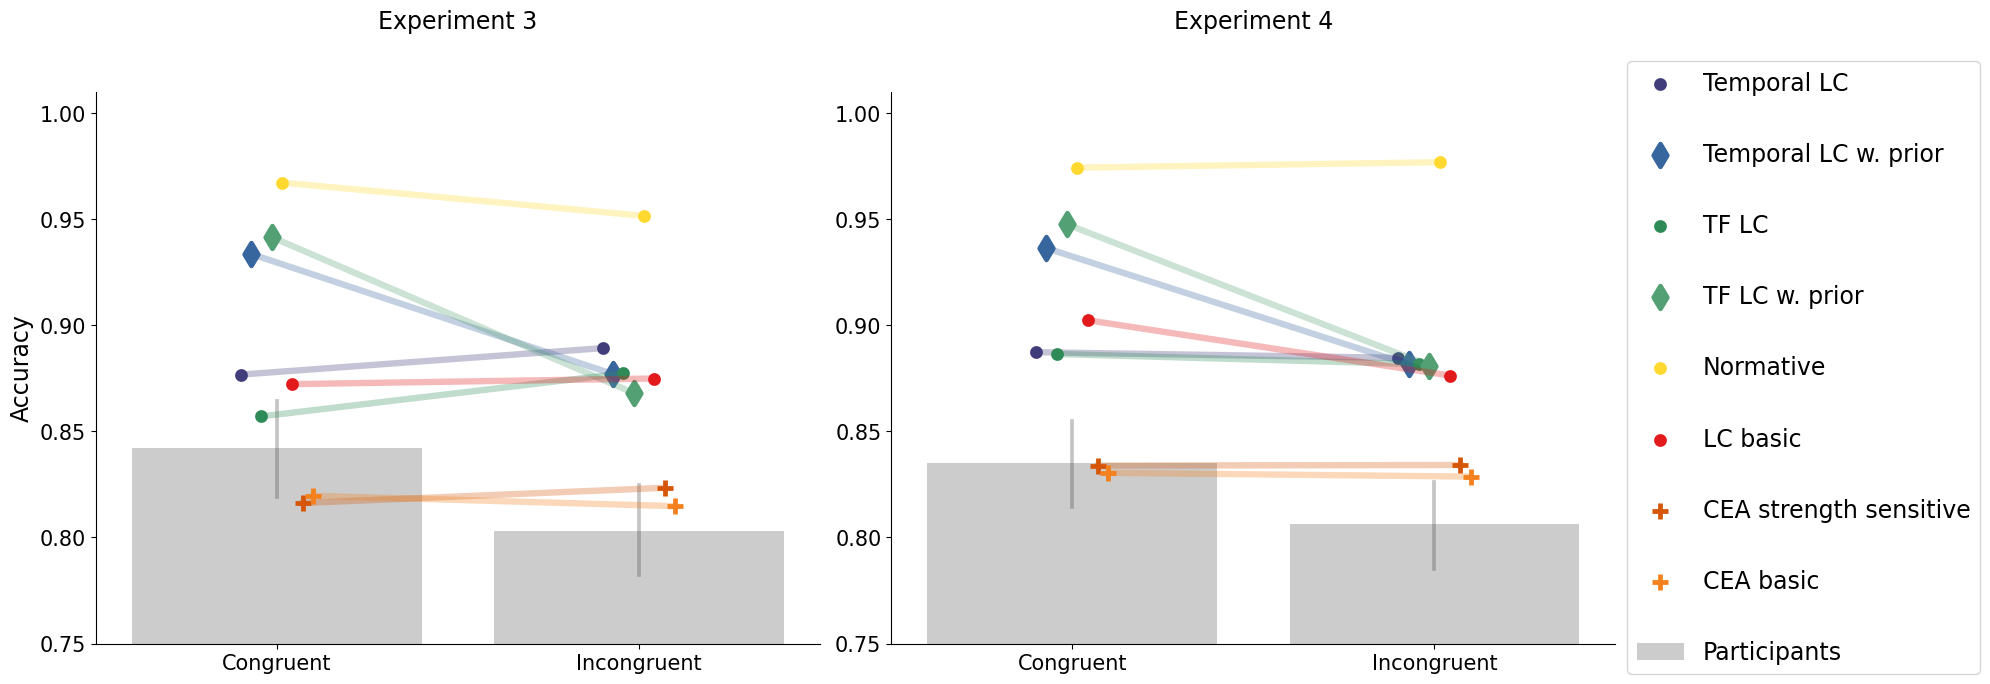

In [4]:
selection = [
    #'TF LC att.',
    #'TF LC att. w. prior',
    'TF LC',
    'TF LC w. prior',
    'Temporal LC',
    'Temporal LC w. prior',
    #'Change w. full knowledge',
    #'Change w. full knowledge w. prior',
    'Normative',
    #'normative w. prior',
    'LC basic',
    #'LC basic w. prior',
    'CEA strength sensitive',
    'CEA basic',
    #'Baseline'
]
print(selection)

fig, axs = plt.subplots(1, 2, figsize=(20, 7))

for i, e_num in enumerate(experiment_nums):
    df = dfs[i]
    df.difficulty = df.difficulty.replace([1, 2], ['Congruent', 'Incongruent'])

    
    df_plot = df[df['model name'].isin(selection)]
    #print(df_3_plot['model name'].unique())
    x = 'difficulty'
    y = 'accuracy'
    hue = 'model name'
    order_diff = ['Congruent', 'Incongruent']

    #sns.swarmplot(x=x, y=y, data=df_long_3, alpha=.4, ax=ax)
    colors = gen_colors(df_plot['model name'].unique(), color_dict)
    sns.set_palette(colors)

    markers, sizes = gen_markers(df_plot['model name'].unique(), markers_dict, 5)
    joins = [False for  _ in markers]
    joins[1] = True

    sns.pointplot(x=x, y=y, data=df_plot, hue=hue, dodge=True, markers=markers, join=joins, ax=axs[i], scale=1.7, ci=None, order=order_diff)
    sns.barplot(x=x, y=y, data=df[df['model name'] == 'Participants'], ci=95, color='black', ax=axs[i], alpha=0.2, label='Participants', order=order_diff)


    sns.despine()
    axs[i].set_ylim(0.75, 1.01)
    if i == 0:
        axs[i].set_ylabel('Accuracy', fontsize=17)
    else:
        axs[i].set_ylabel('', fontsize=17)
    axs[i].set_xlabel('', fontsize=17)

    axs[i].set_title(f'Experiment {e_num}', fontsize=17, y=1.1)

    handles, labels = axs[i].get_legend_handles_labels()
    if i == 1:
        l = plt.legend(handles, labels, labelspacing=2, loc=6, bbox_to_anchor=(1, 0.5), fontsize=17)
    else:
        l = axs[i].legend([], [], frameon=False)
    plt.setp(axs[i].lines, alpha=.3)
    plt.setp(axs[i].get_yticklabels(), fontsize=15)
    plt.setp(axs[i].get_xticklabels(), fontsize=15)

plt.tight_layout()
plt.savefig('./plots/acc_com_model_parts.pdf')
plt.show()

C:\Users\vbtes\AppData\Local\Temp\ipykernel_61412\1902066533.py:40: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.pointplot(x=x, y=y, data=df_plot, hue=hue, dodge=True, markers=markers, join=joins, ax=axs[i], scale=1.7, ci=None, order=order_diff)
c:\Utility\Python\python38\lib\site-packages\seaborn\categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.8364167627835448, 0.3390080738177624, 0.028327566320645904)) for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,
c:\Utility\Python\python38\lib\site-packages\seaborn\categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.9551095732410612, 0.5066820453671664, 0.11298731257208766)) for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, la

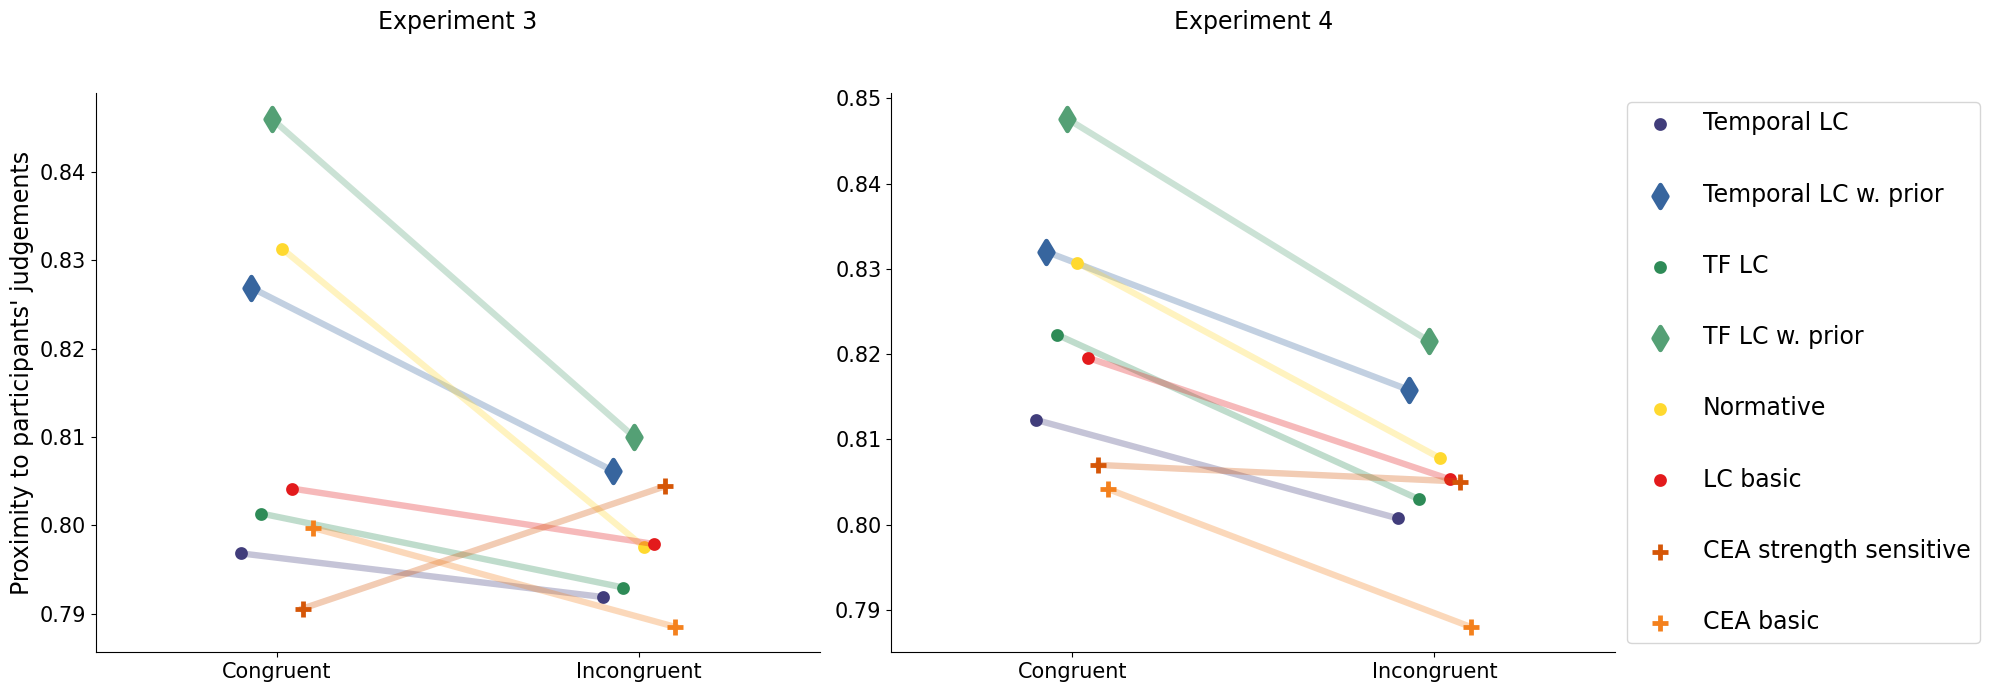

In [5]:
selection = [
    #'TF LC att.',
    #'TF LC att. w. prior',
    'TF LC',
    'TF LC w. prior',
    'Temporal LC',
    'Temporal LC w. prior',
    #'Change w. full knowledge',
    #'Change w. full knowledge w. prior',
    'Normative',
    #'normative w. prior',
    'LC basic',
    #'LC basic w. prior',
    'CEA strength sensitive',
    'CEA basic',
    #'Baseline'
]

fig, axs = plt.subplots(1, 2, figsize=(20, 7))

for i, e_num in enumerate(experiment_nums):
    df = dfs[i]
    df.difficulty = df.difficulty.replace([1, 2], ['Congruent', 'Incongruent'])

    df_plot = df[df['model name'].isin(selection)]
    #print(df_3_plot['model name'].unique())
    x = 'difficulty'
    y = 'judgement_accuracy'
    hue = 'model name'
    order_diff = ['Congruent', 'Incongruent']

    #sns.swarmplot(x=x, y=y, data=df_long_3, alpha=.4, ax=ax)
    colors = gen_colors(df_plot['model name'].unique(), color_dict)
    sns.set_palette(colors)

    markers, sizes = gen_markers(df_plot['model name'].unique(), markers_dict, 5)
    joins = [False for  _ in markers]
    joins[1] = True

    sns.pointplot(x=x, y=y, data=df_plot, hue=hue, dodge=True, markers=markers, join=joins, ax=axs[i], scale=1.7, ci=None, order=order_diff)

    #markers, sizes = gen_markers(['Participants'], markers_dict, 5)
    #sns.pointplot(x=x, y=y, data=df[df['model name'] == 'Participants'], hue=hue, dodge=True, markers=markers, join=joins, ax=axs[i], scale=1.7, ci=None, order=order_diff, color='black')


    sns.despine()
    sns.despine()
    #axs[i].set_ylim(0.75, 1.01)
    if i == 0:
        axs[i].set_ylabel("Proximity to participants' judgements", fontsize=17)
    else:
        axs[i].set_ylabel('', fontsize=17)
    axs[i].set_xlabel('', fontsize=17)

    axs[i].set_title(f'Experiment {e_num}', fontsize=17, y=1.1)

    handles, labels = axs[i].get_legend_handles_labels()
    if i == 1:
        l = plt.legend(handles, labels, labelspacing=2, loc=6, bbox_to_anchor=(1, 0.5), fontsize=17)
    else:
        l = axs[i].legend([], [], frameon=False)

    plt.setp(axs[i].lines, alpha=.3)
    plt.setp(axs[i].get_yticklabels(), fontsize=15)
    plt.setp(axs[i].get_xticklabels(), fontsize=15)
plt.tight_layout()
plt.savefig('./plots/prox_model_to_parts.pdf')

# Local computations accuracy comparisons for TF LC and LC and for optimal and participants' actions

/!\ Run cells in draw_graphs.ipynb first /!\


In [6]:
lc_OA_raw = pd.read_csv('./data/simulated_data/summary_data_run_OA_LC_discrete_&_1.csv')
#att_OA_raw = pd.read_csv('./data/simulated_data/summary_data_run_OA_LC_discrete_att_&_att.csv')
att_OA_raw = pd.read_csv('./data/simulated_data/summary_data_run_OA_Adaptive_Selective_LC_&_1.csv')

def calc_accuracy(ground_truth_str, MAP_str):
    ground_truth = np.array(" ".join(ground_truth_str[1:-1].split(' ')).split(), dtype=float)
    MAP = np.array(" ".join(MAP_str[1:-1].split(' ')).split(), dtype=float)

    acc = 1-pdist(np.stack((ground_truth, MAP)))[0] / np.linalg.norm(abs(np.array(ground_truth)) + 2*np.ones((1, 6)))

    return acc

lc_OA_raw['accuracy'] = lc_OA_raw.apply(lambda x: calc_accuracy(x.ground_truth, x.posterior_map), axis=1)
att_OA_raw['accuracy'] = att_OA_raw.apply(lambda x: calc_accuracy(x.ground_truth, x.posterior_map), axis=1)

participants = lc_OA_raw.copy()
participants['accuracy'] = participants.apply(lambda x: calc_accuracy(x.ground_truth, x.posterior_judgement), axis=1)
participants['model_name'] = 'Participants'

full_summary_TA_raw_all_models = pd.read_csv('./data/simulated_data/summary_data_fit_true.csv')
#full_summary_TA_raw = full_summary_TA_raw_all_models[full_summary_TA_raw_all_models.model_name.isin(['LC_discrete_att_&_att', 'LC_discrete_&_1'])]
full_summary_TA_raw = full_summary_TA_raw_all_models[full_summary_TA_raw_all_models.model_name.isin(['Adaptive_Selective_LC_&_1', 'LC_discrete_&_1'])]

full_summary_TA_raw['accuracy'] = full_summary_TA_raw.apply(lambda x: calc_accuracy(x.ground_truth, x.posterior_map), axis=1)

C:\Users\vbtes\AppData\Local\Temp\ipykernel_61412\351279978.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full_summary_TA_raw['accuracy'] = full_summary_TA_raw.apply(lambda x: calc_accuracy(x.ground_truth, x.posterior_map), axis=1)


In [7]:
lc_OA_raw['tag'] = 'OA'
att_OA_raw['tag'] = 'OA'
full_summary_TA_raw.loc[full_summary_TA_raw.model_name == 'LC_discrete_&_1', 'tag'] = 'TA' 
#full_summary_TA_raw.loc[full_summary_TA_raw.model_name == 'LC_discrete_att_&_att', 'tag'] = 'TA'
full_summary_TA_raw.loc[full_summary_TA_raw.model_name == 'Adaptive_Selective_LC_&_1', 'tag'] = 'TA'


participants['tag'] = 'OA'
participants_2 = participants.copy()
participants_2['tag'] = 'TA'
df = pd.concat([
    lc_OA_raw, 
    att_OA_raw, 
    full_summary_TA_raw, 
    #participants, 
    #participants_2
])

def rename_graphs(name):
    if name[0:3] in ['pos', 'neg']:
        return name.split('_')[1]
    else:
        return name

df['graph_family'] = df.apply(lambda x: rename_graphs(x.scenario), axis=1)
participants['graph_family'] = participants.apply(lambda x: rename_graphs(x.scenario), axis=1)
df['Model Name'] = df.model_name.replace(models_labels)

C:\Users\vbtes\AppData\Local\Temp\ipykernel_61412\3495648893.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full_summary_TA_raw.loc[full_summary_TA_raw.model_name == 'LC_discrete_&_1', 'tag'] = 'TA'


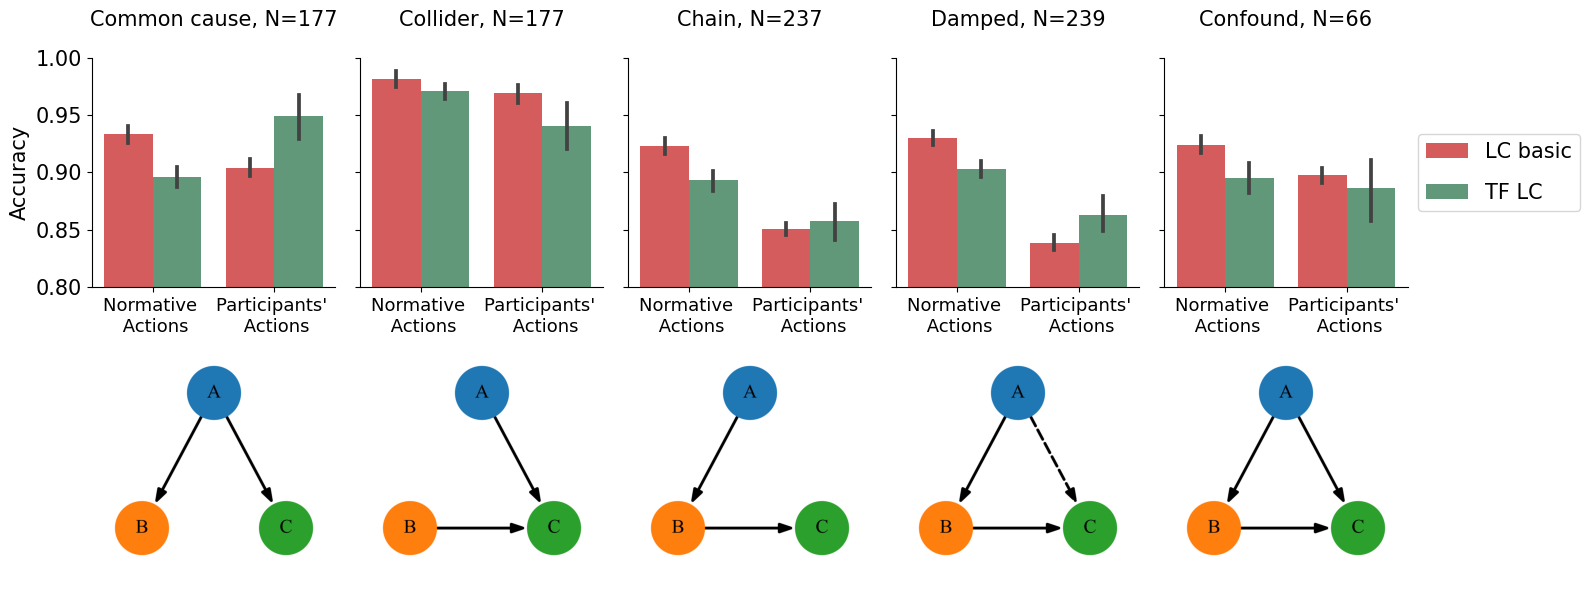

In [8]:
generic_graphs = [
    'ccause', 
    'collider', 
    'chain', 
    'dampened', 
    'confound', 
    #'crime_control',
    #'crime',
    #'finance'
]

model_counts = {
    'ccause': 177,
    'chain': 237,
    'collider': 177,
    'confound': 66,
    'crime': 394,
    'crime_control': 26,
    'dampened': 239,
    'estate': 121,
    'finance': 360
}

nrows = 2
ncols = len(generic_graphs)
ylim = np.array([0.8, 1])
yticks = np.linspace(ylim[0], ylim[1], 5).round(2)

fig, axs = plt.subplots(nrows, ncols, figsize=(16, 6))

for i, graph in enumerate(generic_graphs):
    hue = 'Model Name'
    x = 'tag'
    y = 'accuracy'
    
    df_plot = df[df.graph_family == graph]
    N = model_counts[graph]
    #df_plot.model_name.replace(models_labels, inplace=True)
    #print(graph)
    #print(df_plot.shape)

    colors = gen_colors(df_plot["Model Name"].unique(), color_dict)
    sns.set_palette(colors)
    
    #print(colors)
    #sns.barplot(x='model_name', y='accuracy', data=participants[participants.graph_family == graph], ax=axs[row, col])

    sns.barplot(x=x, y=y, hue=hue, data=df_plot, ax=axs[0, i], alpha=0.8)

    #sns.barplot(x='model_name', y='accuracy', data=participants[participants.graph_family == graph], ax=axs[row, col], linewidth=3, edgecolor=".5", facecolor=(0, 0, 0, 0))

    
    axs[0, i].set_ylim(*ylim)

    title = 'common cause' if graph == 'ccause' else 'damped' if graph == 'dampened' else graph
    
    axs[0, i].set_title(f'{title.capitalize()}, N={N}\n', fontsize=15)# \n{df_plot.ground_truth.tolist()[0]}', fontsize=15)
    
    handles, labels = axs[0, i].get_legend_handles_labels()

    if i < ncols - 1:
        axs[0, i].legend([], [], frameon=False)
    else:
        axs[0, i].legend(handles[0:2], labels[0:2], labelspacing=1, loc=6, bbox_to_anchor=(1, 0.5), fontsize=15)
        
    axs[0, i].set_yticks(yticks)
    plt.setp(axs[0, i].get_yticklabels(), fontsize=15)
    if i == 0:
        axs[0, i].set_ylabel(axs[0, i].get_ylabel().capitalize(), fontsize=15)        
    else:  
        axs[0, i].set_ylabel('')
        axs[0, i].set_yticklabels([])

    sns.despine()

    axs[0, i].set_xticklabels(axs[0, i].get_xticklabels(), fontsize=15)
    axs[0, i].set_xticklabels(["Normative \n Actions", "Participants' \n Actions"], fontsize=13)

    axs[0, i].set_xlabel('')



for i, graph in enumerate(generic_graphs):
    if graph == 'dampened':
        graph_file = 'damped_chain'
    elif graph == 'chain':
        graph_file = 'standard_chain'
    elif graph == 'ccause':
        graph_file = 'common_cause'
    elif graph == 'confound':
        graph_file = 'confounded_chain'
    else:
        graph_file = graph


    path = './plots/'

    img = mpimg.imread(f'{path}{graph_file}.png')
    axs[1, i].imshow(img)
    #os.remove('temporary.png')
    axs[1, i].axis('off')
    


plt.tight_layout()
plt.savefig('./plots/acc_lc_TF_lc_comparison.pdf')
plt.savefig('./plots/acc_lc_TF_lc_comparison.png')
plt.show()